In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#rom tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix	

from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 

#from imblearn.over_sampling import SMOTE

In [2]:
# Wczytanie danych

root_path = "https://raw.githubusercontent.com/matzim95/ML-datasets/master/"
dataset = "breast_cancer.csv"
path_to_data = root_path + dataset
df_cancer = pd.read_csv(path_to_data)

In [3]:
df_cancer.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    object
dtypes: int64(9), object(2)
memory usage: 60.2+ KB


In [5]:
for col in df_cancer.columns:
    if col != "Sample code number":
        print(f"{col} - {df_cancer[col].unique()}")

Clump Thickness - [ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size - [ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape - [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion - [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size - [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei - ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Bland Chromatin - [ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli - [ 1  2  7  4  5  3 10  6  9  8]
Mitoses - [ 1  5  4  2  3  7 10  8  6]
Class - ['benign' 'malignant']


In [6]:
total_values = df_cancer.shape[0]
non_values = df_cancer[df_cancer["Bare Nuclei"] == "?"].shape[0]

([<matplotlib.patches.Wedge at 0x161f0466a40>,
 [Text(-1.0972828665449132, 0.07726778621766105, 'Total values'),
  Text(1.197035857865381, -0.08429208138663538, 'Missing values')],
 [Text(-0.5985179272063162, 0.04214606520963329, '97.8%'),
  Text(0.6982709170881389, -0.04917038080887063, '2.2%')])

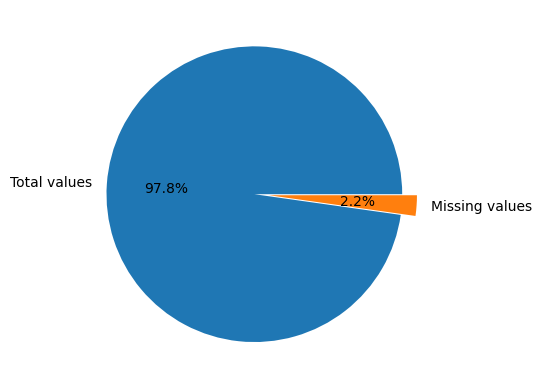

In [7]:
explode = (0,0.1)
fig, ax = plt.subplots()
ax.pie([total_values, non_values],explode=explode, labels=["Total values", "Missing values"], autopct='%1.1f%%')

In [8]:
#removes missing data
df_cancer = df_cancer[df_cancer["Bare Nuclei"] != "?"]

In [9]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    object
dtypes: int64(9), object(2)
memory usage: 64.0+ KB


In [10]:
df_cancer['Bare Nuclei'] = df_cancer['Bare Nuclei'].astype("int")

In [11]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    int32 
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    object
dtypes: int32(1), int64(9), object(1)
memory usage: 61.4+ KB


In [12]:
#podział danych na dwie klasy
df_benign = df_cancer[df_cancer["Class"] == "benign"]
df_malignant = df_cancer[df_cancer["Class"] == "malignant"]

print(f"{len(df_benign)} {df_malignant.shape[0]}")

444 239


In [13]:
#usuwanie zbędnych kolumn

df_benign = df_benign.drop(columns=["Sample code number", "Class", "Bare Nuclei"])
df_malignant = df_malignant.drop(columns=["Sample code number", "Class", "Bare Nuclei"])
features = list(df_benign.columns)

print(f"features {features}")

features ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']


In [14]:
#df_benign = df_benign.drop(columns=["Bere Nuclei"])
#df_malignant = df_malignant.drop(columns=["Bere Nuclei"])

In [15]:
print(len(features))

8


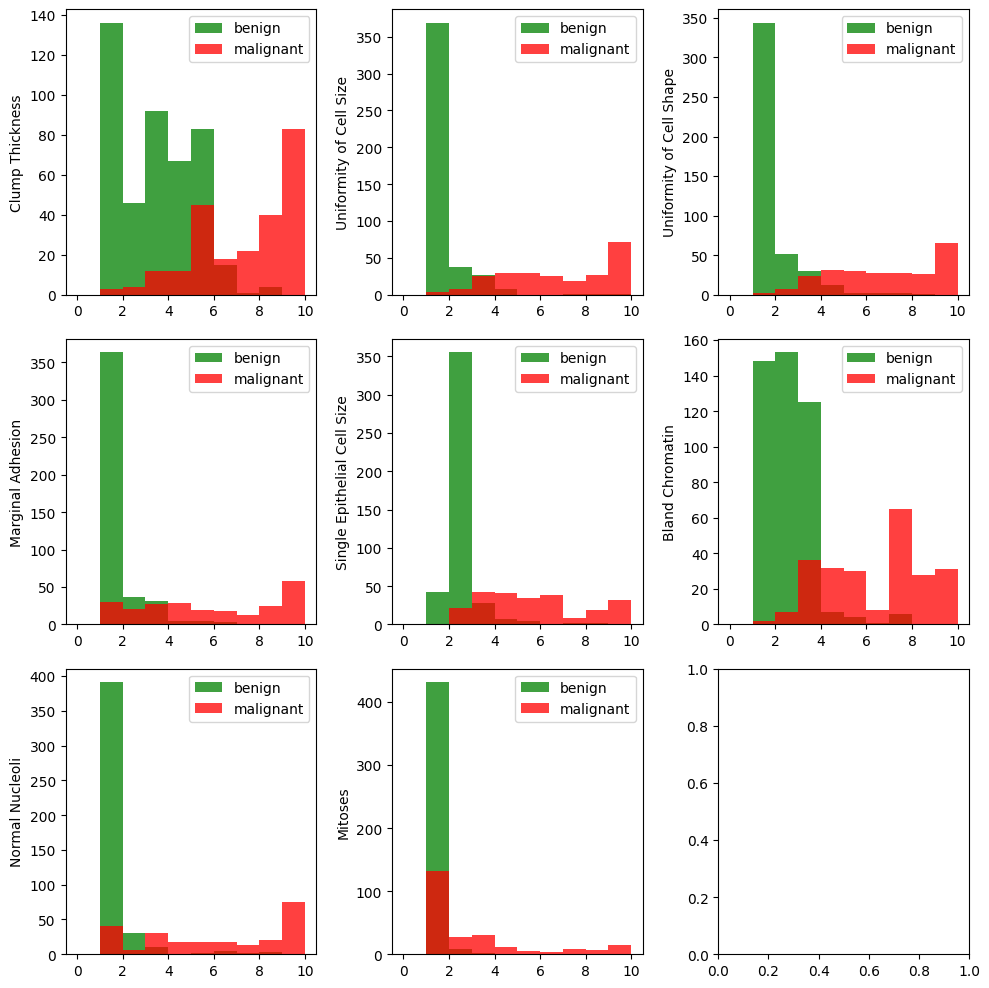

In [16]:
fig, ax = plt.subplots(3, 3)
for counter, feature_name in enumerate(features):
  i = counter // 3
  j = counter % 3
  ax[i, j].hist(df_benign[feature_name], bins=range(0, 11), density=False, facecolor='g', alpha=0.75, label="benign")
  ax[i, j].hist(df_malignant[feature_name], bins=range(0, 11), density=False, facecolor='r', alpha=0.75, label="malignant")
  ax[i, j].set_ylabel(feature_name)
  ax[i, j].legend()

fig.set_size_inches(10, 10)
plt.tight_layout()

In [17]:
df_malignant

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
5,8,10,10,8,7,9,7,1
12,5,3,3,3,2,4,4,1
14,8,7,5,10,7,5,5,4
15,7,4,6,4,6,4,3,1
18,10,7,7,6,4,4,1,2
...,...,...,...,...,...,...,...,...
681,5,10,10,10,4,5,6,3
691,5,10,10,5,4,4,4,1
696,5,10,10,3,7,8,10,2
697,4,8,6,4,3,10,6,1


In [18]:
# Podział macierzy X(cechy) , Y (etykiety)
df_features = df_cancer[[col for col in df_cancer.columns if col not in ["Sample code number", "Class"]]]
df_labels = df_cancer["Class"]

In [19]:
X = df_features.to_numpy()
Y, classes = pd.factorize(df_labels)

print(classes)

Index(['benign', 'malignant'], dtype='object')


In [20]:
#Podział zbioru na trnigowy i testowy
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print(f"X_train_shape={X_train.shape}\tY_train_shape={Y_train.shape}")
print(f"X_test_shape={X_test.shape}\tY_test_shape={Y_test.shape}")

X_train_shape=(546, 9)	Y_train_shape=(546,)
X_test_shape=(137, 9)	Y_test_shape=(137,)


In [21]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, Y_train)

LogisticRegression()

In [22]:
Y_pred = model_logreg.predict(X_test)

#metryki
print(f"(2) metryki ze sklearn")
print(f"accuracy={accuracy_score(Y_test, Y_pred).round(3)}")
print(f"precision={precision_score(Y_test, Y_pred).round(3)}")
print(f"recall={recall_score(Y_test, Y_pred).round(3)}")
print(f"F1={f1_score(Y_test, Y_pred).round(3)}")

(2) metryki ze sklearn
accuracy=0.956
precision=0.981
recall=0.914
F1=0.946
